# Goal of the project:

###### The "Fintech" company launch their android and ois mobile base app and want to grow their business. But there is problem how to recomended this app and offer who really want to use it. So for that company desided to give free trial to each and every coustomers. In this senerio some customer purchase the app and someone not. According to this data company want to give special offer to the customer who are not intrested to buy without offer and grow the buisness.

###### This is Classification problem

## Import essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
finetech_appdata = pd.read_csv(r"C:\Users\rahul\Downloads\FineTech_appData.csv")
finetech_appdata

user               first_open  dayofweek       hour  age  \
0      235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1      333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2      254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3      234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4       51549  2013-02-26 18:50:48.661          1   18:00:00   31   
...       ...                      ...        ...        ...  ...   
49995  222774  2013-05-09 13:46:17.871          3   13:00:00   32   
49996  169179  2013-04-09 00:05:17.823          1   00:00:00   35   
49997  302367  2013-02-20 22:41:51.165          2   22:00:00   39   
49998  324905  2013-04-28 12:33:04.288          6   12:00:00   27   
49999   27047  2012-12-14 01:22:44.638          4   01:00:00   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                      Splash,Cycle,Loan           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled            enrolled_date  \
0             0                     0         0                      NaN   
1             0                     0         0                      NaN   
2             0                     1         0                      NaN   
3             0                     0         1  2013-07-05 16:11:49.513   
4             0                     0         1  2013-02-26 18:56:37.841   
...         ...                   ...       ...                      ...   
49995         0                     0         1  2013-05-09 13:47:52.875   
49996         0                     1         0                      NaN   
49997         0                     0         0                      NaN   
49998         0                     0         1  2013-04-28 12:35:38.709   
49999         0                     0         0                      NaN   

       liked  
0          0  
1          0  
2          1  
3          0  
4          1  
...      ...  
49995      0  
49996      0  
49997      0  
49998      0  
49999      1  

[50000 rows x 12 columns]

In [3]:
for i in [1,2,3,4,5]:
    print(finetech_appdata.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [4]:
finetech_appdata.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [5]:
finetech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [6]:
finetech_appdata.describe()

user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000  
25%                0.000000      0.000000      0.000000  
50%                0.000000      1.000000      0.000000  
75%                0.000000      1.000000      0.000000  
max                1.000000      1.000000      1.000000

In [7]:
features = finetech_appdata.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n..................\n """.
         format(i,finetech_appdata[i].unique(),len(finetech_appdata[i].unique())))
#     print("Unique value of {}\n".format(i))
#     print("{}\n".format(finetech_appdata[i].unique()))
#     print("len is {} \n................\n".format(len(finetech_appdata[i].unique())))


Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
..................
 
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
..................
 
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
..................
 
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
..................
 
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90

In [8]:
finetech_appdata['hour'] = finetech_appdata.hour.str.slice(1,3).astype(int)

In [9]:
finetech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [10]:
finetech_appdata2 = finetech_appdata.drop(['user','first_open','screen_list','enrolled_date'],axis = 1)

In [11]:
finetech_appdata2.head()

dayofweek  hour  age  numscreens  minigame  used_premium_feature  enrolled  \
0          3     2   23          15         0                     0         0   
1          6     1   24          13         0                     0         0   
2          1    19   23           3         0                     1         0   
3          4    16   28          40         0                     0         1   
4          1    18   31          32         0                     0         1   

   liked  
0      0  
1      0  
2      1  
3      0  
4      1

## Data Visualisation

### Heatmap Using Correlation matrix

Text(0.5, 1.0, 'Heatmap ussing correlation matrix of fintech_appdata2')

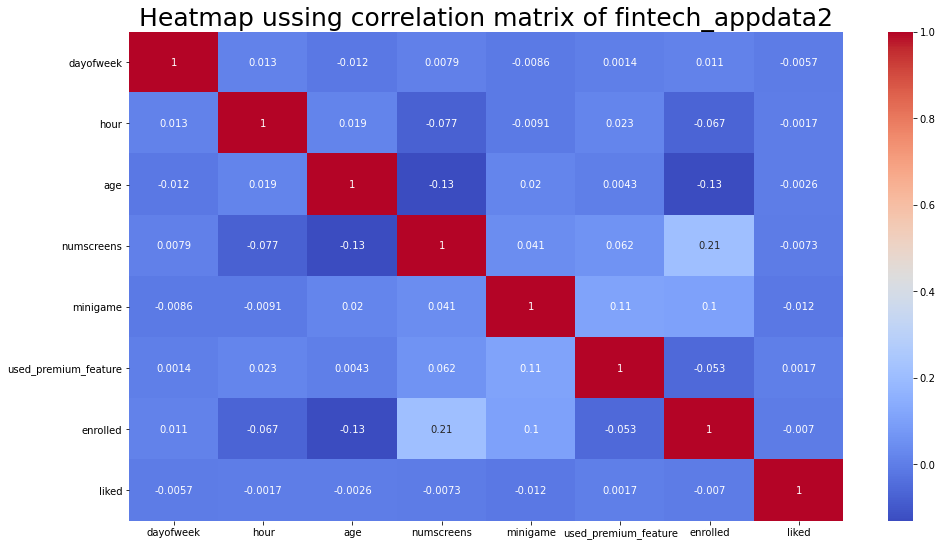

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(finetech_appdata2.corr(),annot = True,cmap = 'coolwarm')
plt.title("Heatmap ussing correlation matrix of fintech_appdata2",fontsize = 25)

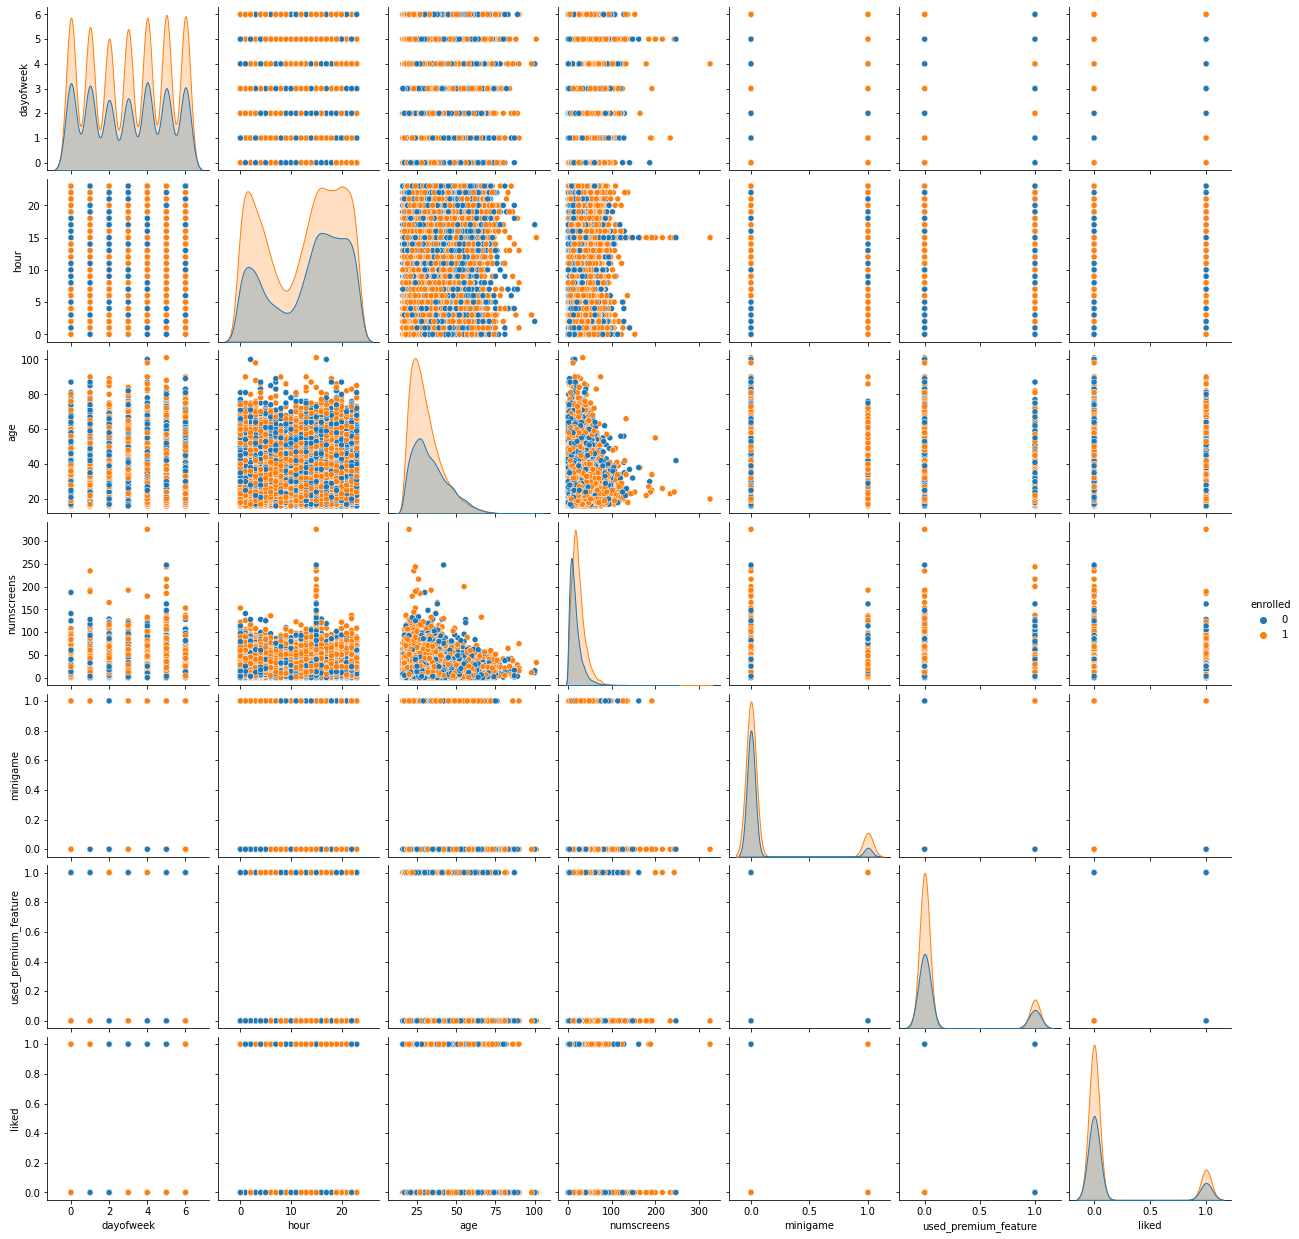

In [13]:
sns.pairplot(finetech_appdata2,hue = 'enrolled')

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

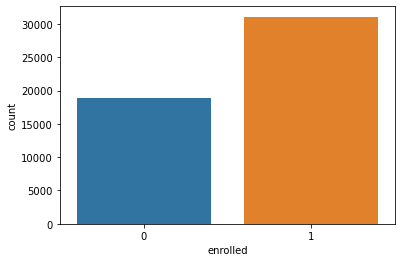

In [14]:
sns.countplot(finetech_appdata2.enrolled)

In [15]:
print("Not enrolled user = ",(finetech_appdata2.enrolled <1).sum(),'out of 50000')
print("Enrolled user = ",50000-(finetech_appdata2.enrolled <1).sum(),'out of 50000')

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


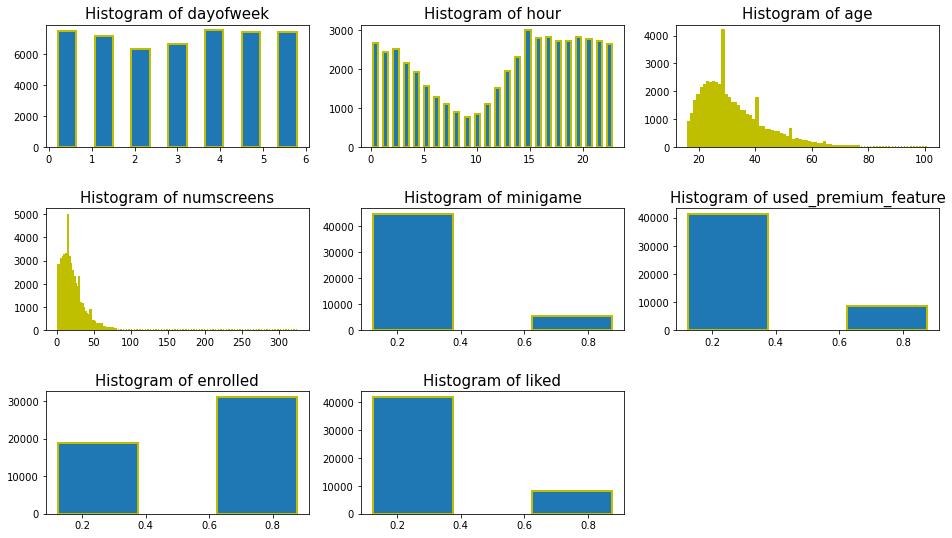

In [16]:
plt.figure(figsize = (16,9))
features = finetech_appdata2.columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    plt.title("Histogram of {}".format(j),fontsize = 15)
    bins = len(finetech_appdata2[j].unique())
    plt.hist(finetech_appdata2[j],bins=bins,rwidth = .5,edgecolor = 'y',linewidth = 2)
plt.subplots_adjust(hspace = 0.5)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


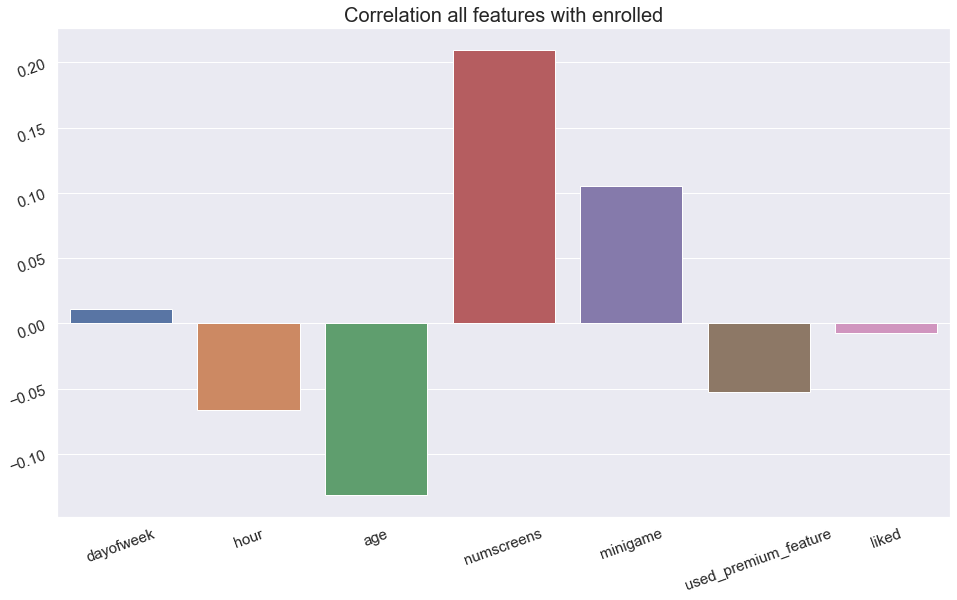

In [17]:
sns.set()
plt.figure(figsize = (16,9))
plt.title("Correlation all features with enrolled",fontsize = 20)
finetech_appdata3 = finetech_appdata2.drop(['enrolled'],axis=1)
ax = sns.barplot(finetech_appdata3.columns,finetech_appdata3.corrwith(finetech_appdata2.enrolled))
ax.tick_params(labelsize =15,labelrotation =20,color = 'k')

In [18]:
finetech_appdata['first_open'] = [parser.parse(i) for i in finetech_appdata['first_open']]
finetech_appdata['enrolled_date'] = [parser.parse(i) if isinstance(i,str) else i for i in finetech_appdata['enrolled_date']]

In [19]:
finetech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            50000 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  int32         
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   used_premium_feature  50000 non-null  int64         
 9   enrolled              50000 non-null  int64         
 10  enrolled_date         31074 non-null  datetime64[ns]
 11  liked                 50000 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


In [20]:
finetech_appdata['time_to_enrolled'] = (finetech_appdata.enrolled_date - finetech_appdata.first_open).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

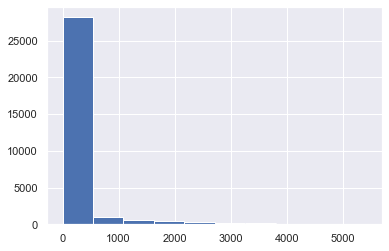

In [21]:
plt.hist(finetech_appdata['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

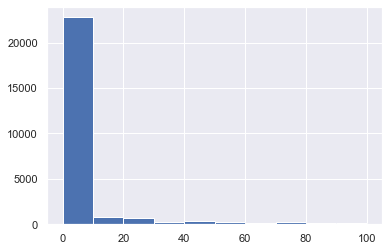

In [22]:
plt.hist(finetech_appdata['time_to_enrolled'].dropna(), range = (0,100))

In [23]:
finetech_appdata.loc[finetech_appdata.time_to_enrolled>48,'enrolled'] = 0

In [24]:
finetech_appdata

user              first_open  dayofweek  hour  age  \
0      235136 2012-12-27 02:14:51.273          3     2   23   
1      333588 2012-12-02 01:16:00.905          6     1   24   
2      254414 2013-03-19 19:19:09.157          1    19   23   
3      234192 2013-07-05 16:08:46.354          4    16   28   
4       51549 2013-02-26 18:50:48.661          1    18   31   
...       ...                     ...        ...   ...  ...   
49995  222774 2013-05-09 13:46:17.871          3    13   32   
49996  169179 2013-04-09 00:05:17.823          1     0   35   
49997  302367 2013-02-20 22:41:51.165          2    22   39   
49998  324905 2013-04-28 12:33:04.288          6    12   27   
49999   27047 2012-12-14 01:22:44.638          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                      Splash,Cycle,Loan           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled           enrolled_date  \
0             0                     0         0                     NaT   
1             0                     0         0                     NaT   
2             0                     1         0                     NaT   
3             0                     0         1 2013-07-05 16:11:49.513   
4             0                     0         1 2013-02-26 18:56:37.841   
...         ...                   ...       ...                     ...   
49995         0                     0         1 2013-05-09 13:47:52.875   
49996         0                     1         0                     NaT   
49997         0                     0         0                     NaT   
49998         0                     0         1 2013-04-28 12:35:38.709   
49999         0                     0         0                     NaT   

       liked  time_to_enrolled  
0          0               NaN  
1          0               NaN  
2          1               NaN  
3          0               0.0  
4          1               0.0  
...      ...               ...  
49995      0               0.0  
49996      0               NaN  
49997      0               NaN  
49998      0               0.0  
49999      1               NaN  

[50000 rows x 13 columns]

In [25]:
finetech_appdata.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [26]:
finetech_appdata

user  dayofweek  hour  age  \
0      235136          3     2   23   
1      333588          6     1   24   
2      254414          1    19   23   
3      234192          4    16   28   
4       51549          1    18   31   
...       ...        ...   ...  ...   
49995  222774          3    13   32   
49996  169179          1     0   35   
49997  302367          2    22   39   
49998  324905          6    12   27   
49999   27047          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                      Splash,Cycle,Loan           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled  liked  
0             0                     0         0      0  
1             0                     0         0      0  
2             0                     1         0      1  
3             0                     0         1      0  
4             0                     0         1      1  
...         ...                   ...       ...    ...  
49995         0                     0         1      0  
49996         0                     1         0      0  
49997         0                     0         0      0  
49998         0                     0         1      0  
49999         0                     0         0      1  

[50000 rows x 10 columns]

In [27]:
finetech_appdata_screen_data = pd.read_csv("C:\\Users\\rahul\\Downloads\\top_screens.csv").top_screens.values

In [28]:
finetech_appdata_screen_data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [29]:
type(finetech_appdata_screen_data)

numpy.ndarray

In [30]:
finetech_appdata['screen_list'] = finetech_appdata.screen_list.astype(str)+','

In [31]:
finetech_appdata

user  dayofweek  hour  age  \
0      235136          3     2   23   
1      333588          6     1   24   
2      254414          1    19   23   
3      234192          4    16   28   
4       51549          1    18   31   
...       ...        ...   ...  ...   
49995  222774          3    13   32   
49996  169179          1     0   35   
49997  302367          2    22   39   
49998  324905          6    12   27   
49999   27047          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                     Splash,Cycle,Loan,           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                Cycle,Splash,Home,RewardsContainer,           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled  liked  
0             0                     0         0      0  
1             0                     0         0      0  
2             0                     1         0      1  
3             0                     0         1      0  
4             0                     0         1      1  
...         ...                   ...       ...    ...  
49995         0                     0         1      0  
49996         0                     1         0      0  
49997         0                     0         0      0  
49998         0                     0         1      0  
49999         0                     0         0      1  

[50000 rows x 10 columns]

In [32]:
for screen_name in finetech_appdata_screen_data:
    finetech_appdata[screen_name] = finetech_appdata.screen_list.str.contains(screen_name).astype(int)
    finetech_appdata['screen_list'] = finetech_appdata.screen_list.str.replace(screen_name+",","")

In [33]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [34]:
finetech_appdata.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [35]:
finetech_appdata.screen_list.str.replace('Splash'+",","")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
5        Home,ScanPreview,VerifySSN,product_review,prod...
6              product_review,product_review2,ScanPreview,
7        Home,product_review,product_review2,ScanPrevie...
8        product_review,product_review2,ScanPreview,Ver...
9        Home,product_review,product_review,product_rev...
10            Home,Settings,product_review,product_review,
11       product_review,Home,SelectInstitution,product_...
12       joinscreen,product_review,product_review2,Scan...
13                                                   Home,
14       joinscreen,product_review,product_review2,Scan...
15       joinscreen,product_review,product_review2,Veri...
16       product_review,product_review,product_review,p.

In [36]:
finetech_appdata.shape

(50000, 68)

In [37]:
finetech_appdata.head(10)

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   
5   56480          2     9   20   
6  144649          1     2   35   
7  249366          1     3   26   
8  372004          2    14   29   
9  338013          4    18   26   

                                         screen_list  numscreens  minigame  \
0  joinscreen,product_review,ScanPreview,VerifyTo...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                                              3         0   
3  product_review,Home,product_review,ReferralCon...          40         0   
4  joinscreen,ScanPreview,VerifySSN,Home,SelectIn...          32         0   
5  Home,ScanPreview,VerifySSN,product_review,prod...          14         0   
6        product_review,product_review2,ScanPreview,           3         0   
7  Home,product_review,product_review2,ScanPrevie...          41         0   
8  product_review,product_review2,ScanPreview,Ver...          33         1   
9  Home,product_review,product_review,product_rev...          19         0   

   used_premium_feature  enrolled  liked  Loan2  location  Institutions  \
0                     0         0      0      1         0             0   
1                     0         0      0      1         1             1   
2                     1         0      1      0         0             0   
3                     0         1      0      0         1             0   
4                     0         1      1      1         0             1   
5                     0         1      0      1         0             1   
6                     0         0      0      0         0             0   
7                     1         0      0      1         0             0   
8                     1         0      0      1         1             1   
9                     0         1      0      1         1             0   

   Credit3Container  VerifyPhone  BankVerification  VerifyDateOfBirth  \
0                 0            1                 0                  1   
1                 0            1                 0                  1   
2                 0            0                 0                  0   
3                 0            1                 0                  1   
4                 1            1                 1                  0   
5                 0            1                 0                  0   
6                 0            0                 0                  0   
7                 1            1                 1                  0   
8                 0            1                 1                  0   
9                 0            1                 1                  1   

   ProfilePage  VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  \
0            0              0      1         1                 0      0   
1            0              1      0         0                 0      0   
2            0              0      1         0                 0      0   
3            0              0      0         0                 0      1   
4            0              1      1         1                 0      0   
5            0              0      1         1                 1      0   
6            0              0      0         0                 0      0   
7            0              1      1         0                 1      0   
8            0              1      0         0                 0      0   
9            0              1      0         0                 0      0   

   CC1Category  Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  \
0            0       0     0    0                 0        0        0   
1            0       0     0    0                 0        0        0   
2            0       1     1    0                 0        0        0   
3           

In [38]:
finetech_appdata.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [39]:
finetech_appdata.screen_list.str.count(",").head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [40]:
finetech_appdata['remain_screen_list'] = finetech_appdata.screen_list.str.count(",")

In [41]:
finetech_appdata.drop(columns=['screen_list'],inplace = True)

In [42]:
finetech_appdata.head(10)

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   
5   56480          2     9   20          14         0                     0   
6  144649          1     2   35           3         0                     0   
7  249366          1     3   26          41         0                     1   
8  372004          2    14   29          33         1                     1   
9  338013          4    18   26          19         0                     0   

   enrolled  liked  Loan2  location  Institutions  Credit3Container  \
0         0      0      1         0             0                 0   
1         0      0      1         1             1                 0   
2         0      1      0         0             0                 0   
3         1      0      0         1             0                 0   
4         1      1      1         0             1                 1   
5         1      0      1         0             1                 0   
6         0      0      0         0             0                 0   
7         0      0      1         0             0                 1   
8         0      0      1         1             1                 0   
9         1      0      1         1             0                 0   

   VerifyPhone  BankVerification  VerifyDateOfBirth  ProfilePage  \
0            1                 0                  1            0   
1            1                 0                  1            0   
2            0                 0                  0            0   
3            1                 0                  1            0   
4            1                 1                  0            0   
5            1                 0                  0            0   
6            0                 0                  0            0   
7            1                 1                  0            0   
8            1                 1                  0            0   
9            1                 1                  1            0   

   VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  CC1Category  \
0              0      1         1                 0      0            0   
1              1      0         0                 0      0            0   
2              0      1         0                 0      0            0   
3              0      0         0                 0      1            0   
4              1      1         1                 0      0            0   
5              0      1         1                 1      0            0   
6              0      0         0                 0      0            0   
7              1      1         0                 1      0            0   
8              1      0         0                 0      0            0   
9              1      0         0                 0      0            0   

   Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  EditProfile  \
0       0     0    0                 0        0        0            0   
1       0     0    0                 0        0        0            0   
2       1     1    0                 0        0        0            0   
3       0     0    0                 0        1        1            0   
4       0     0    0                 0        0        1            0   
5       0     0    0                 0        0        1            0   
6       0     0    0                 0        0        0            0   
7       1     0    0                 0        0        0            0   
8       0     1    0                 1        0        0            0   
9       0     0    0                 0        0 

In [43]:
finetech_appdata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [44]:
saving_screens = ['Saving1','Saving2','Saving2Amount','Saving4','Saving5',
                 'Saving6','Saving7','Saving8','Saving9','Saving10']
finetech_appdata['saving_screens_count'] = finetech_appdata[saving_screens].sum(axis = 1)
finetech_appdata.drop(columns=saving_screens,inplace = True)

In [45]:
finetech_appdata.head(6)

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   
5   56480          2     9   20          14         0                     0   

   enrolled  liked  Loan2  location  Institutions  Credit3Container  \
0         0      0      1         0             0                 0   
1         0      0      1         1             1                 0   
2         0      1      0         0             0                 0   
3         1      0      0         1             0                 0   
4         1      1      1         0             1                 1   
5         1      0      1         0             1                 0   

   VerifyPhone  BankVerification  VerifyDateOfBirth  ProfilePage  \
0            1                 0                  1            0   
1            1                 0                  1            0   
2            0                 0                  0            0   
3            1                 0                  1            0   
4            1                 1                  0            0   
5            1                 0                  0            0   

   VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  CC1Category  \
0              0      1         1                 0      0            0   
1              1      0         0                 0      0            0   
2              0      1         0                 0      0            0   
3              0      0         0                 0      1            0   
4              1      1         1                 0      0            0   
5              0      1         1                 1      0            0   

   Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  EditProfile  \
0       0     0    0                 0        0        0            0   
1       0     0    0                 0        0        0            0   
2       1     1    0                 0        0        0            0   
3       0     0    0                 0        1        1            0   
4       0     0    0                 0        0        1            0   
5       0     0    0                 0        0        1            0   

   Credit2  Finances  CC3  Alerts  Leaderboard  VerifyMobile  VerifyHousing  \
0        0         0    0       0            0             0              0   
1        0         0    0       0            0             0              0   
2        0         0    0       0            0             0              0   
3        1         1    0       0            1             0              0   
4        0         0    0       0            0             0              0   
5        0         0    0       0            0             0              0   

   RewardDetail  VerifyHousingAmount  ProfileMaritalStatus  ProfileChildren   \
0             0                    0                     0                 0   
1             0                    0                     0                 0   
2             0                    0                     0                 0   
3             1                    0                     0                 0   
4             0                    0                     0                 0   
5             0                    0                     0                 0   

   ProfileEducation  ProfileEducationMajor  Rewards  AccountView  \
0                 0                      0        0            0   
1                 0                      0        0            0   
2                 0                      0        0            0   
3                 0                      0        1

In [46]:
credit_screens = ['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
finetech_appdata['credit_screens_count'] = finetech_appdata[credit_screens].sum(axis = 1)
finetech_appdata.drop(columns=credit_screens,inplace = True)

In [47]:
cc_screens = ['CC1','CC1Category','CC3']
finetech_appdata['cc_screens_count'] = finetech_appdata[cc_screens].sum(axis = 1)
finetech_appdata.drop(columns=cc_screens,inplace = True)

In [48]:
loan_screens = ['Loan','Loan2','Loan3','Loan4']
finetech_appdata['loan_screens_count'] = finetech_appdata[loan_screens].sum(axis = 1)
finetech_appdata.drop(columns=loan_screens,inplace = True)

In [49]:
finetech_appdata.head(10)

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   
5   56480          2     9   20          14         0                     0   
6  144649          1     2   35           3         0                     0   
7  249366          1     3   26          41         0                     1   
8  372004          2    14   29          33         1                     1   
9  338013          4    18   26          19         0                     0   

   enrolled  liked  location  Institutions  VerifyPhone  BankVerification  \
0         0      0         0             0            1                 0   
1         0      0         1             1            1                 0   
2         0      1         0             0            0                 0   
3         1      0         1             0            1                 0   
4         1      1         0             1            1                 1   
5         1      0         0             1            1                 0   
6         0      0         0             0            0                 0   
7         0      0         0             0            1                 1   
8         0      0         1             1            1                 1   
9         1      0         1             0            1                 1   

   VerifyDateOfBirth  ProfilePage  VerifyCountry  Cycle  idscreen  Splash  \
0                  1            0              0      1         1       0   
1                  1            0              1      0         0       0   
2                  0            0              0      1         0       1   
3                  1            0              0      0         0       0   
4                  0            0              1      1         1       0   
5                  0            0              0      1         1       0   
6                  0            0              0      0         0       0   
7                  0            0              1      1         0       1   
8                  0            0              1      0         0       0   
9                  1            0              1      0         0       0   

   RewardsContainer  EditProfile  Finances  Alerts  Leaderboard  VerifyMobile  \
0                 0            0         0       0            0             0   
1                 0            0         0       0            0             0   
2                 0            0         0       0            0             0   
3                 0            0         1       0            1             0   
4                 0            0         0       0            0             0   
5                 0            0         0       0            0             0   
6                 0            0         0       0            0             0   
7                 0            0         0       0            0             0   
8                 1            0         0       0            0             0   
9                 0            0         0       0            0             0   

   VerifyHousing  RewardDetail  VerifyHousingAmount  ProfileMaritalStatus  \
0              0             0                    0                     0   
1              0             0                    0                     0   
2              0             0                    0                     0   
3              0             1                    0                     0   
4              0             0                    0                     0   
5              0             0                    0                     0   
6       

In [50]:
finetech_appdata.shape

(50000, 50)

In [51]:
finetech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [52]:
finetech_appdata.describe()

user     dayofweek          hour          age    numscreens  \
count   50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean   186889.729900      3.029860     12.557220     31.72436     21.095900   
std    107768.520361      2.031997      7.438072     10.80331     15.728812   
min        13.000000      0.000000      0.000000     16.00000      1.000000   
25%     93526.750000      1.000000      5.000000     24.00000     10.000000   
50%    187193.500000      3.000000     14.000000     29.00000     18.000000   
75%    279984.250000      5.000000     19.000000     37.00000     28.000000   
max    373662.000000      6.000000     23.000000    101.00000    325.000000   

           minigame  used_premium_feature      enrolled         liked  \
count  50000.000000          50000.000000  50000.000000  50000.000000   
mean       0.107820              0.172020      0.497000      0.165000   
std        0.310156              0.377402      0.499996      0.371184   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      0.000000      0.000000   
75%        0.000000              0.000000      1.000000      0.000000   
max        1.000000              1.000000      1.000000      1.000000   

           location  Institutions   VerifyPhone  BankVerification  \
count  50000.000000  50000.000000  50000.000000      50000.000000   
mean       0.517760      0.293660      0.524600          0.319540   
std        0.499689      0.455443      0.499399          0.466303   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        1.000000      0.000000      1.000000          0.000000   
75%        1.000000      1.000000      1.000000          1.000000   
max        1.000000      1.000000      1.000000          1.000000   

       VerifyDateOfBirth   ProfilePage  VerifyCountry         Cycle  \
count       50000.000000  50000.000000   50000.000000  50000.000000   
mean            0.473480      0.158040       0.423160      0.364860   
std             0.499301      0.364782       0.494065      0.481396   
min             0.000000      0.000000       0.000000      0.000000   
25%             0.000000      0.000000       0.000000      0.000000   
50%             0.000000      0.000000       0.000000      0.000000   
75%             1.000000      0.000000       1.000000      1.000000   
max             1.000000      1.000000       1.000000      1.000000   

           idscreen        Splash  RewardsContainer   EditProfile  \
count  50000.000000  50000.000000      50000.000000  50000.000000   
mean       0.340700      0.200760          0.084000      0.048980   
std        0.473949      0.400573          0.277391      0.215828   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        1.000000      0.000000          0.000000      0.000000   
max        1.000000      1.000000          1.000000      1.000000   

           Finances        Alerts   Leaderboard  VerifyMobile  VerifyHousing  \
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000   
mean       0.076540      0.073720      0.051520      0.053860       0.045080   
std        0.265863      0.261317      0.221058      0.225743       0.207482   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%        0.000000      0.000000      0.000000      0.000000       0.000000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

       RewardDetail  VerifyHousingAmount 

<AxesSubplot:>

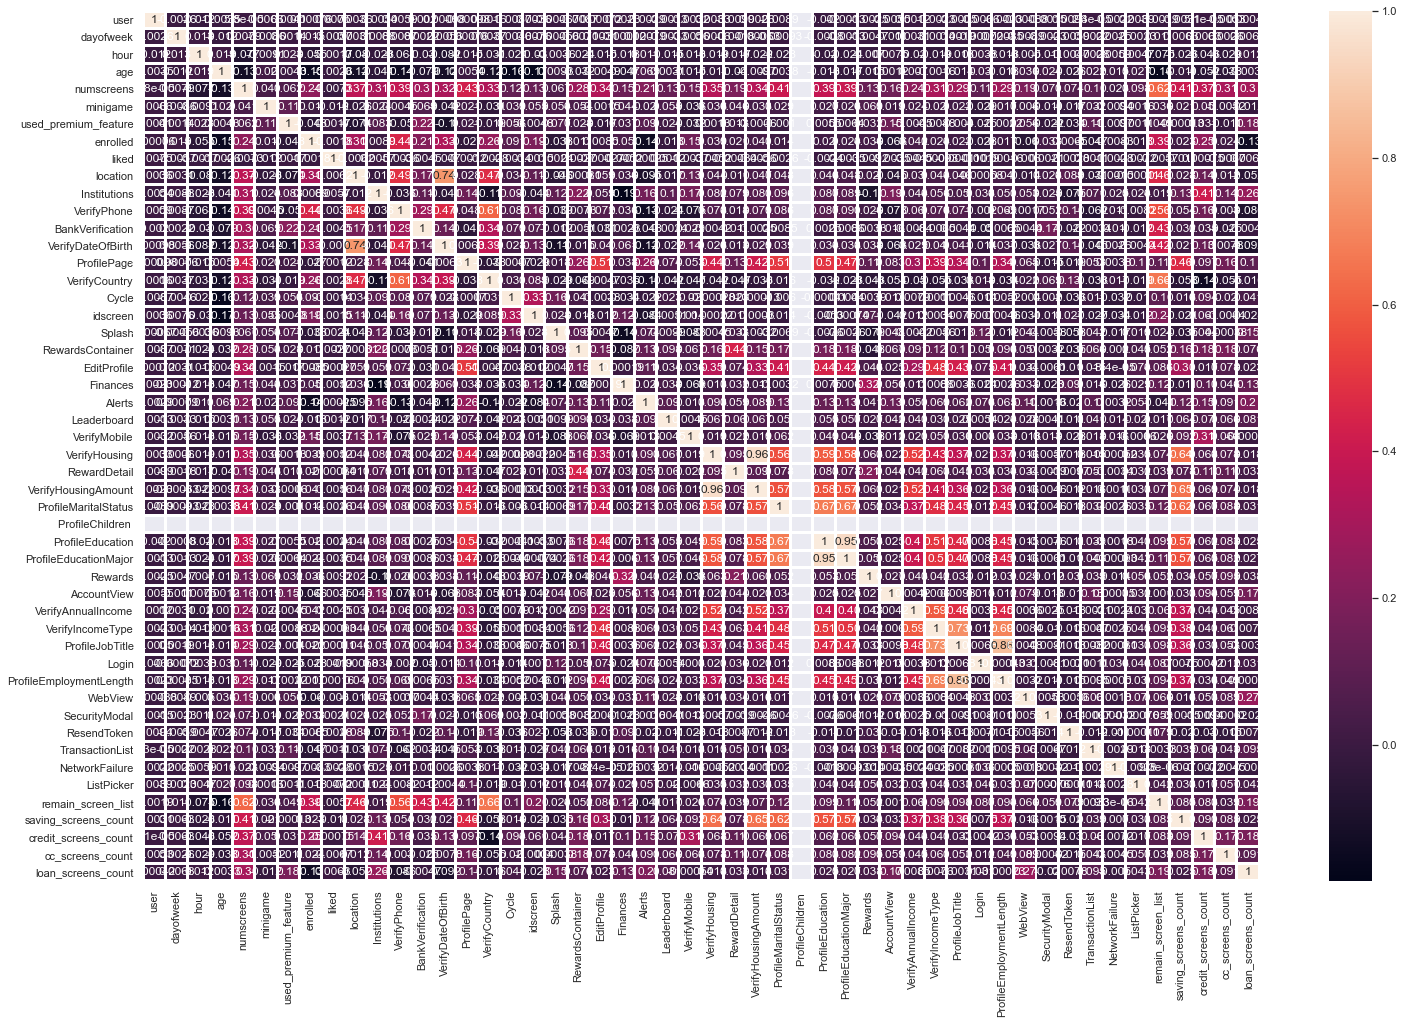

In [53]:
plt.figure(figsize = (25,16))
sns.heatmap(finetech_appdata.corr(),annot = True, linewidth = 2)

### Data Preprocessing

In [54]:
clean_fintech_appdata = finetech_appdata
target = finetech_appdata['enrolled']
finetech_appdata.drop(columns='enrolled',inplace = True)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(finetech_appdata,target,test_size = 0.2,random_state = 0)

In [56]:
print("Shape of X_train = ",X_train.shape)
print("Shape of X_test = ",X_test.shape)
print("Shape of y_train = ",y_train.shape)
print("Shape of y_test = ",y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [57]:
train_userID = X_train['user']
X_train.drop(columns = 'user',inplace = True)
test_userID = X_test['user']
X_test.drop(columns = 'user',inplace = True)

C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
print("Shape of X_train = ",X_train.shape)
print("Shape of X_test = ",X_test.shape)
print("Shape of train_useID = ",train_userID.shape)
print("Shape of test_userID = ",test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_useID =  (40000,)
Shape of test_userID =  (10000,)


### Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

### Model Building

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.6936

In [62]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dt_model.fit(X_train_sc,y_train)
y_pred_dt_sc = dt_model.predict(X_test_sc)
accuracy_score(y_test,y_pred_dt_sc)

0.6932

### K – Nearest Neighbor Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.6978

In [64]:
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.7315

### Naive Bayes Classifier

In [65]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

0.7114

In [66]:
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_nb_sc)

0.7114

### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

0.7621

In [68]:
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7616

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7685

In [70]:
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)

0.768

### Support Vector Classifier

In [71]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

0.7609

In [72]:
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)

0.7789

### XGBoost Classifier

In [73]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.781

In [74]:
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)

0.781

In [75]:
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)
 
accuracy_score(y_test, y_pred_xgb_pt1)

0.7879

In [76]:
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)

0.7879

### Confusion Matrix

Text(0.5, 1.0, 'Confussion Matrix')

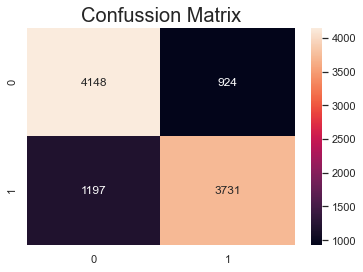

In [77]:
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 

In [78]:
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
 
print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



### Cross-validation of the ML model

In [79]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

Cross validation of XGBoost model =  [0.793   0.78    0.78925 0.783   0.779   0.7875  0.79325 0.7795  0.79125
 0.77825]
Cross validation of XGBoost model (in mean) =  0.7853999999999999


### Mapping predicted output to the target

In [80]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc_pt2
 
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
31902   65042         1                 0
30346  207226         1                 1
12363  363062         0                 0
32490  152296         1                 1
26128   64484         0                 0
14227   38108         1                 1
26376  359940         0                 0
44173  136089         0                 0
12968   14231         1                 1
32104  216038         0                 0
17844   18918         1                 1
43460  316730         1                 1
8369    28308         1                 0
15055  228387         1                 1
6338    69640         1                 1
15301  358264         0                 0
46250  348059         0                 0
45580  178743         1           

### Save the model

In [81]:
## Pickle
import pickle
 
# save model
pickle.dump(xgb_model_pt2, open('FineTech_app_ML_model.pickle', 'wb'))
 
# load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))
 
# predict the output
y_pred_pl = ml_model_pl.predict(X_test_sc)
 
# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confussion matrix = \n', cm_pl)
 
# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))

Confussion matrix = 
 [[4148  924]
 [1197 3731]]
Accuracy of model =  0.7879


In [82]:
## Joblib
import joblib
 
# save model
joblib.dump(xgb_model_pt2, 'FineTech_app_ML_model.joblib')
 
# load model
ml_model_jl = joblib.load('FineTech_app_ML_model.joblib')
 
# predict the output 
y_pred_jl = ml_model_jl.predict(X_test_sc)
 
cm_jl = confusion_matrix(y_test, y_pred_jl)
print('Confussion matrix = \n', cm_jl)
 
print("Accuracy of model = ", accuracy_score(y_test, y_pred_jl))

Confussion matrix = 
 [[4148  924]
 [1197 3731]]
Accuracy of model =  0.7879
